# NASCAR_analysis_ohbm

In [1]:
from scipy.io import loadmat
import numpy as np
import hcp_utils as hcp
#import nilearn.plotting as plotting

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set("paper", "white")
%matplotlib inline
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

#from analysis import plot_results

import npp
#from sklearn.preprocessing import minmax_scale

import seaborn as sns
from scipy.stats import ttest_ind

import utility
import npp

from hrf_tools import apply_optimal_hrf_10hz

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


ModuleNotFoundError: No module named 'npp'

## Load data from matlab

load The Present

In [3]:
outputs_file='NASCAR/results.mat'
mat_contents = loadmat(outputs_file)


In [4]:
mat_contents

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Jun 14 19:44:55 2023',
 '__version__': '1.0',
 '__globals__': [],
 'U2': array([[array([[-3.4073372e-03, -1.0552441e-03, -8.0202967e-03,  3.3179647e-03],
                [-2.9655434e-03, -4.6803970e-03, -1.3428688e-04, -1.5539578e-03],
                [-3.9094188e-03, -4.0847370e-03, -1.5574443e-03,  2.9854234e-03],
                ...,
                [ 9.6548123e-05, -5.5534072e-04, -4.0886403e-04,  5.4330234e-05],
                [-1.0006059e-03, -2.9220269e-04, -5.4102094e-04, -3.6285090e-04],
                [-1.6724194e-03, -2.6526829e-04, -1.1402215e-03, -2.0926286e-04]],
               dtype=float32)                                                     ],
        [array([[ 1.9508597e-02, -1.5359169e-01, -6.0052783e-03,  9.3255438e-02],
                [-3.0936614e-02,  1.4881432e-01,  3.3182446e-02, -1.4305516e-01],
                [-3.8291291e-05,  1.4980535e-04, -3.5254685e-05,  9.5277472e-04],
          

In [6]:
U2=mat_contents['U2']


In [16]:
U2[2][0]

array([[0.5715008 , 0.35490552, 0.7328573 , 0.45104718],
       [0.44268554, 0.81065506, 0.57683164, 0.8380896 ],
       [0.6909533 , 0.46570423, 0.36081228, 0.30685863]], dtype=float32)

In [13]:
outputs_file='/om2/scratch/Fri/jsmentch/nascar_data/output/results_TP_clean.mat'
#mat_contents = loadmat(outputs_file, squeeze_me=True, simplify_cells = True)
mat_contents = loadmat(outputs_file)
rank=19
components_TP=mat_contents['result']['U'][0,rank][0,0]
temporal_modes_TP=mat_contents['result']['U'][0,rank][1,0]
contributions_TP=mat_contents['result']['U'][0,rank][2,0]

meta_file='/om2/scratch/Fri/jsmentch/nascar_data/input/movieTP_meta.mat'
mat_contents = loadmat(meta_file)
dx_list_TP=mat_contents['dx_list'].squeeze()
sub_list_TP=mat_contents['sub_list']
ses_list_TP=mat_contents['ses_list']


Load resting state

In [14]:
rest_file='/om2/scratch/Fri/jsmentch/nascar_data/output/results_rest_run-1.mat'
mat_contents = loadmat(outputs_file)
rank=19
components_rest=mat_contents['result']['U'][0,rank][0,0]
temporal_modes_rest=mat_contents['result']['U'][0,rank][1,0]
contributions_rest=mat_contents['result']['U'][0,rank][2,0]

load Despicable Me

In [15]:
outputs_file='/om2/scratch/Fri/jsmentch/nascar_data/output/results_movieDM.mat'
#mat_contents = loadmat(outputs_file, squeeze_me=True, simplify_cells = True)
mat_contents = loadmat(outputs_file)
rank=19
components_DM=mat_contents['result']['U'][0,rank][0,0]
temporal_modes_DM=mat_contents['result']['U'][0,rank][1,0]
contributions_DM=mat_contents['result']['U'][0,rank][2,0]

meta_file='/om2/scratch/Fri/jsmentch/nascar_data/input/movieDM_meta.mat'
mat_contents = loadmat(meta_file)
dx_list_DM=mat_contents['dx_list'].squeeze()
sub_list_DM=mat_contents['sub_list']
ses_list_DM=mat_contents['ses_list']


## Load DM movie features from PyNS

## Compare the movies and rest (correlation clustermaps)

In [16]:
all_components=np.hstack((components_DM,components_TP,components_rest))

In [17]:
all_components.shape

(91282, 60)

In [18]:
col_list=[]
for i in np.arange(20):
    col_list.append(f'DM Component {i+1}')
for i in np.arange(20):
    col_list.append(f'TP Component {i+1}')
for i in np.arange(20):
    col_list.append(f'Rest Component {i+1}')

<AxesSubplot:>

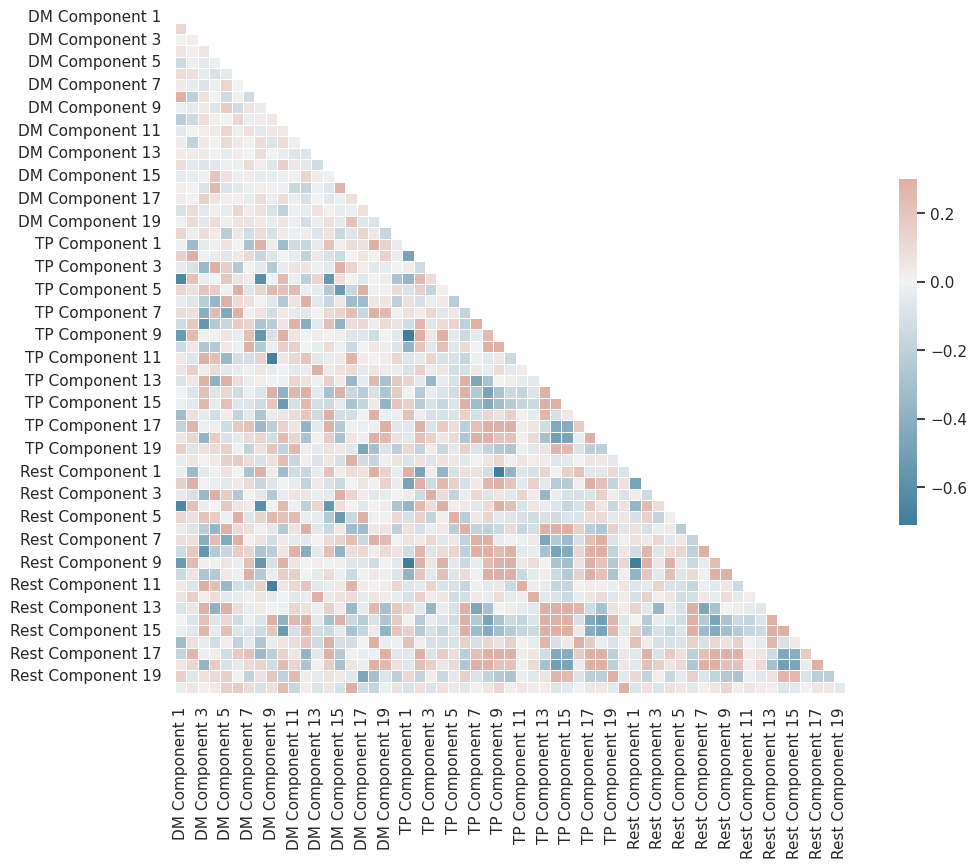

In [19]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=all_components,
                 columns=col_list)

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

/om2/user/jsmentch/anaconda/envs/nilearn/lib/python3.9/site-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


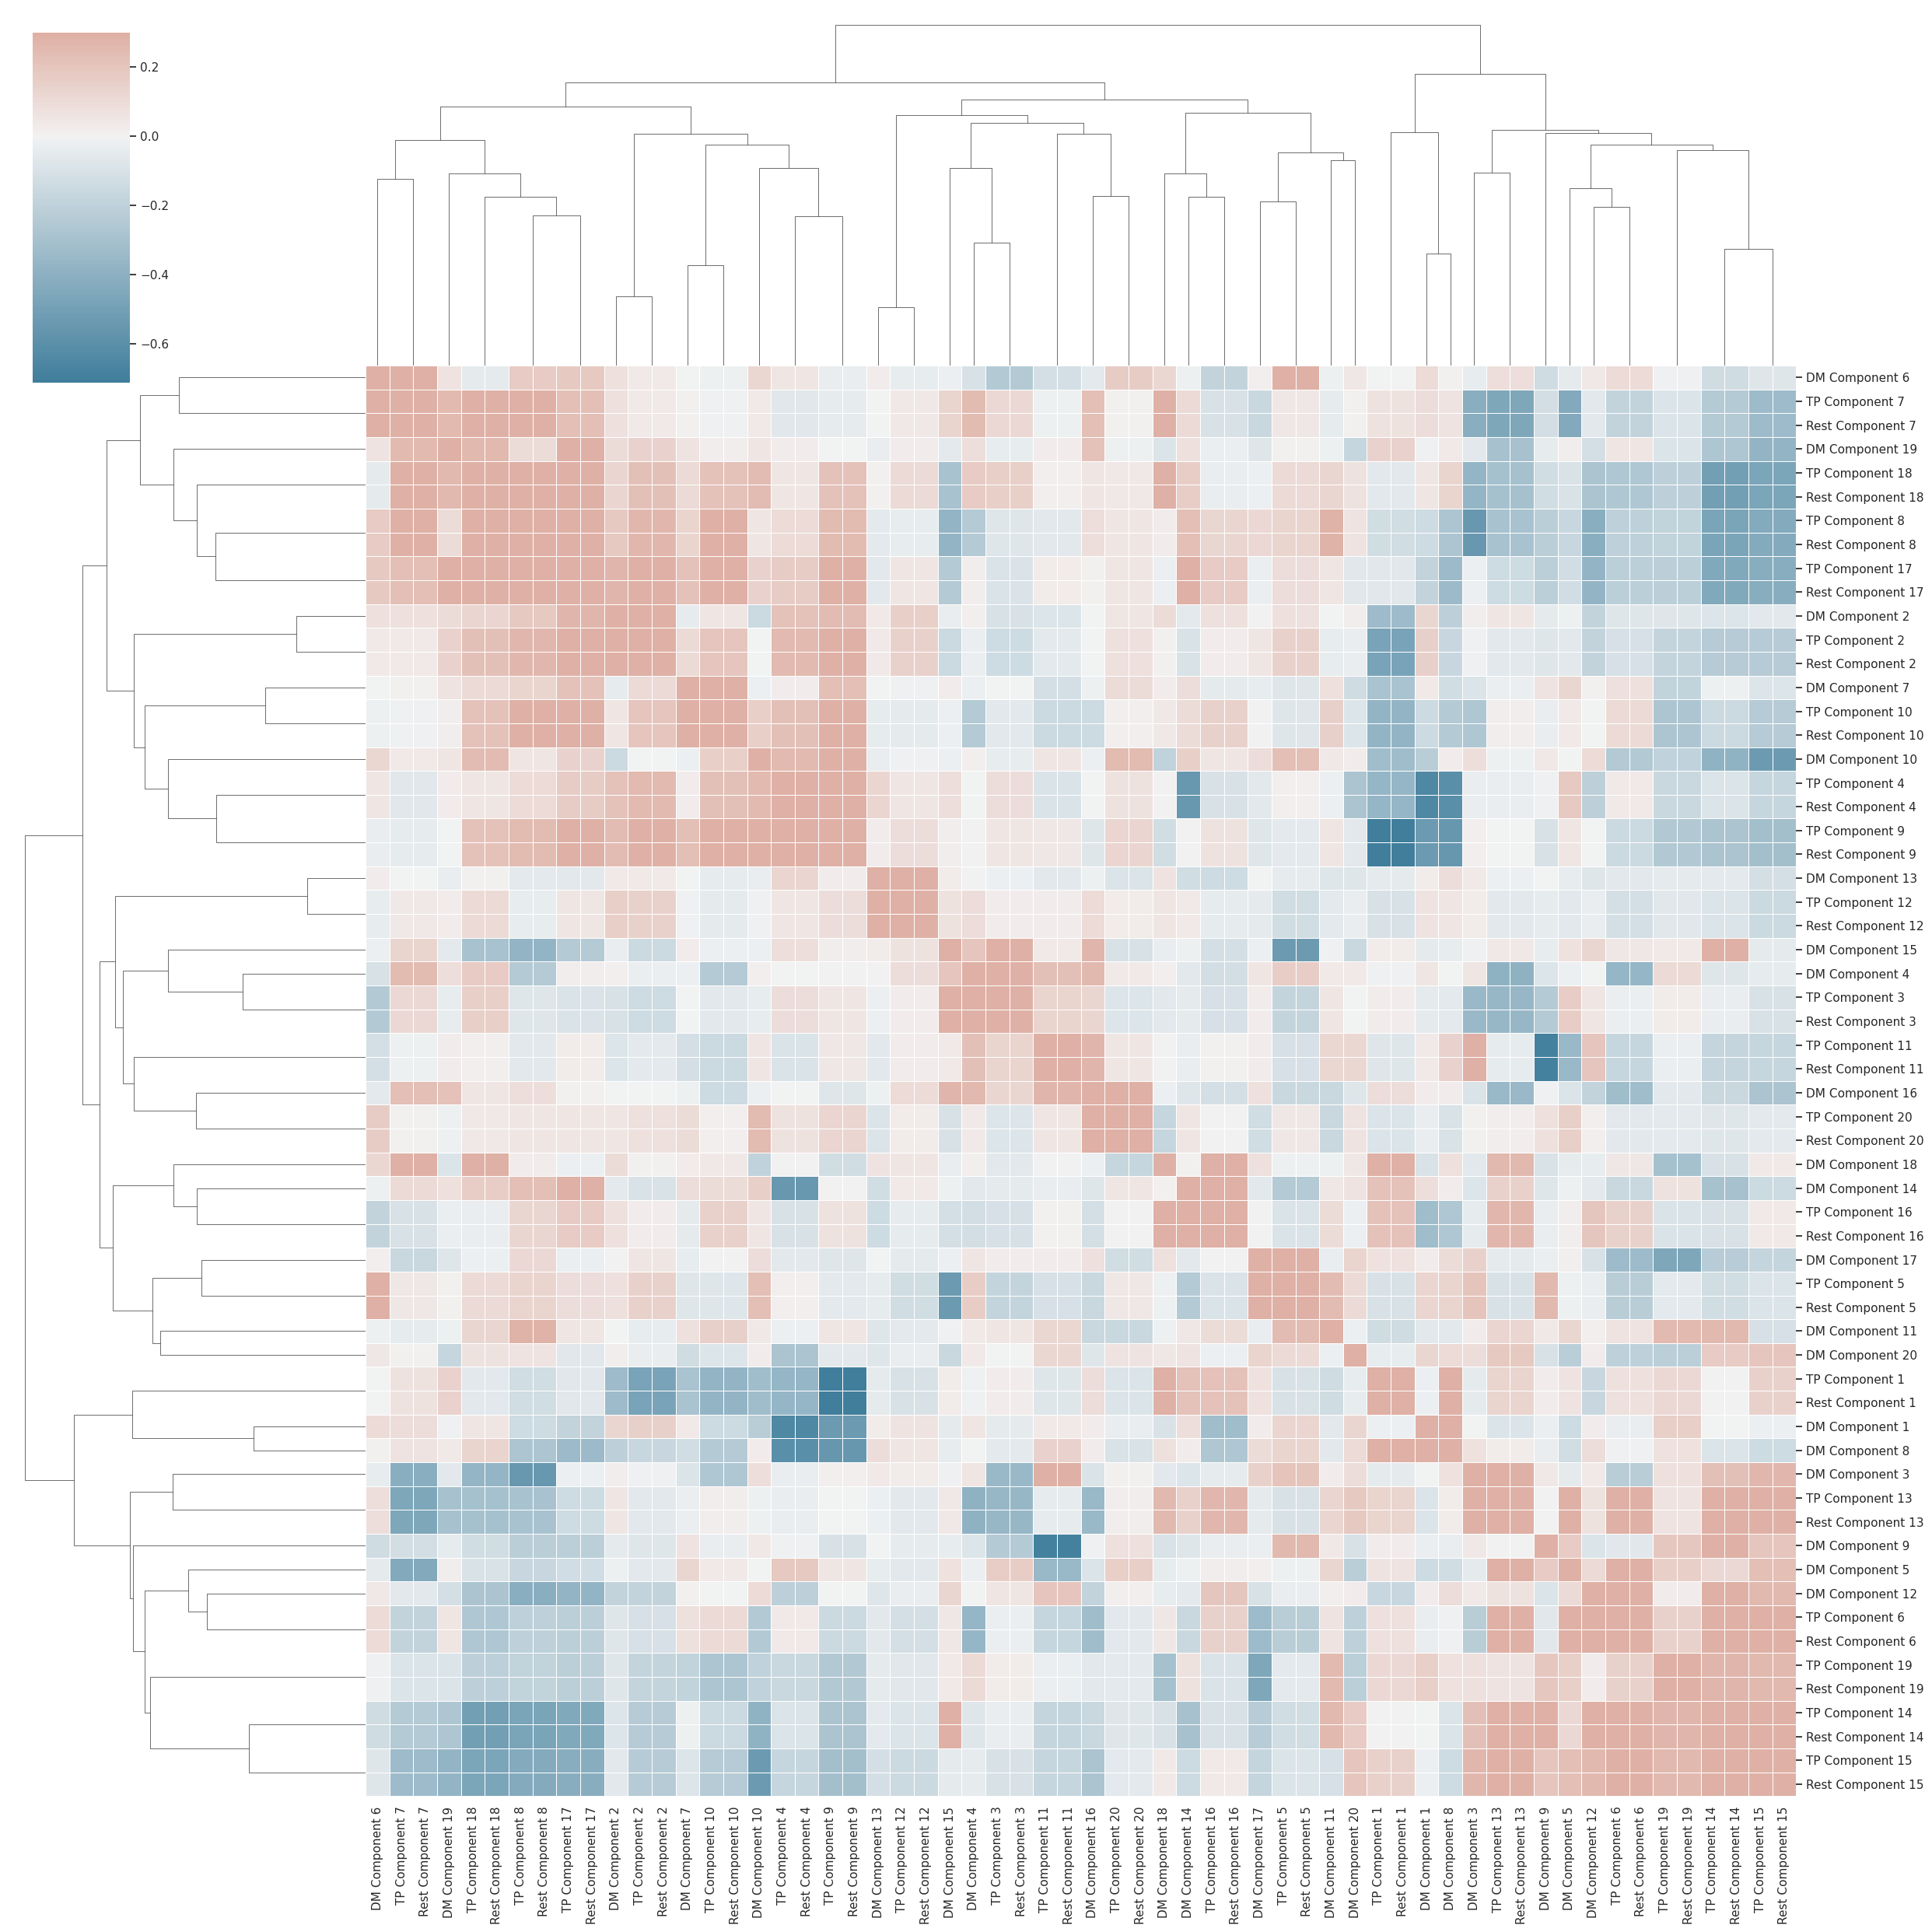

In [28]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=all_components,
                 columns=col_list)

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
#mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
#f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
clustergrid=sns.clustermap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, figsize=(25,25))

In [29]:
np.save('cluster_indices_DM_TP_REST',clustergrid.dendrogram_col.reordered_ind)

[5,
 26,
 46,
 18,
 37,
 57,
 27,
 47,
 36,
 56,
 1,
 21,
 41,
 6,
 29,
 49,
 9,
 23,
 43,
 28,
 48,
 12,
 31,
 51,
 14,
 3,
 22,
 42,
 30,
 50,
 15,
 39,
 59,
 17,
 13,
 35,
 55,
 16,
 24,
 44,
 10,
 19,
 20,
 40,
 0,
 7,
 2,
 32,
 52,
 8,
 4,
 11,
 25,
 45,
 38,
 58,
 33,
 53,
 34,
 54]

### Compare group contributions to the components

In [11]:
asc_ind=np.nonzero(dx_list)[0]
td_ind=np.where(dx_list == 0)[0]
t_list=[]
p_list=[]
for i in np.arange( contributions.shape[1] ):
    asc_contributions = contributions[:,i][asc_ind]
    td_contributions = contributions[:,i][td_ind]
    t,p=ttest_ind(asc_contributions, td_contributions)
    t_list.append(t)
    p_list.append(p)

In [12]:
dx_list_string=[]
for d in dx_list:
    dx_list_string.append( ['TD','ASC'][d] )
column_list=[]
for i in np.arange(20):
    column_list.append(f'component{i+1}')
    
df = pd.DataFrame(contributions, columns=column_list)
df.insert(0, "dx", dx_list_string, True)
df.insert(0, "ses", ses_list, True)
df.insert(0, "sub", sub_list, True)
df=pd.melt(df, id_vars=['sub','ses','dx'], value_vars=column_list, var_name='component', value_name='contribution')

[Text(0.5, 1.0, 'Individual Contributions to each Component by Diagnostic Status')]

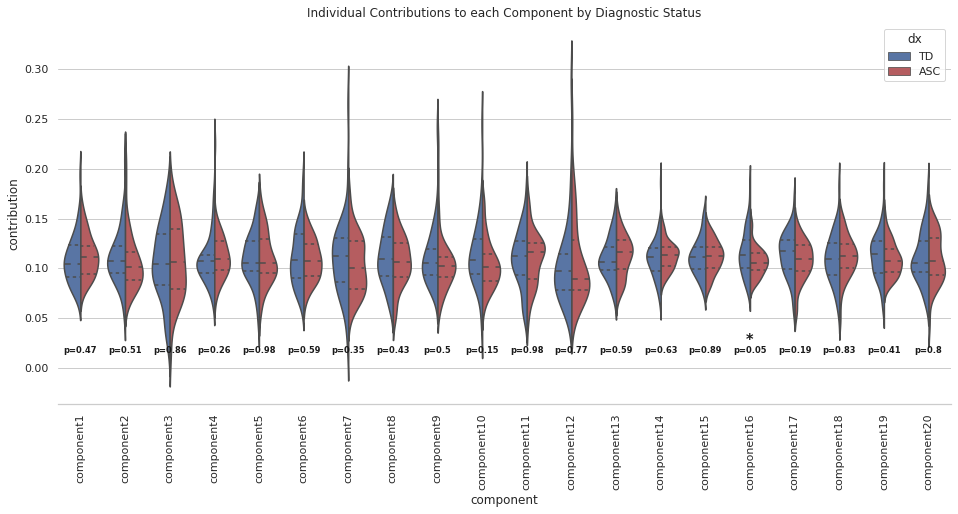

In [18]:
plt.rcParams['figure.dpi'] = 72
plt.rcParams['savefig.dpi'] = 72
plt.figure(figsize=(16,7))

sns.set_theme(style="whitegrid")
#sns.set(font_scale=2)
# Draw a nested violinplot and split the violins for easier comparison
violinplot=sns.violinplot(data=df, x="component", y="contribution", hue="dx",
               split=True, inner="quart", linewidth=1.5, palette={"TD": "b", "ASC": "r"})
sns.despine(left=True)
plt.xticks(rotation=90)


#p_values = df.groupby(['component'])['contribution'].median()
vertical_offset = df['contribution'].median() * 0.05 # offset from median for display

for xtick in violinplot.get_xticks():
    violinplot.text(xtick,0.01 + vertical_offset, f'p={round(p_list[xtick],2)}', 
            horizontalalignment='center',size='x-small',color='k',weight='semibold')
xtick=15
violinplot.text(xtick,0.02 + vertical_offset, f'*', 
            horizontalalignment='center',size='large',color='k',weight='semibold')

violinplot.set(title='Individual Contributions to each Component by Diagnostic Status')

[Text(0.5, 1.0, 'Individual Contributions to each Component by Diagnostic Status (Despicable Me)')]

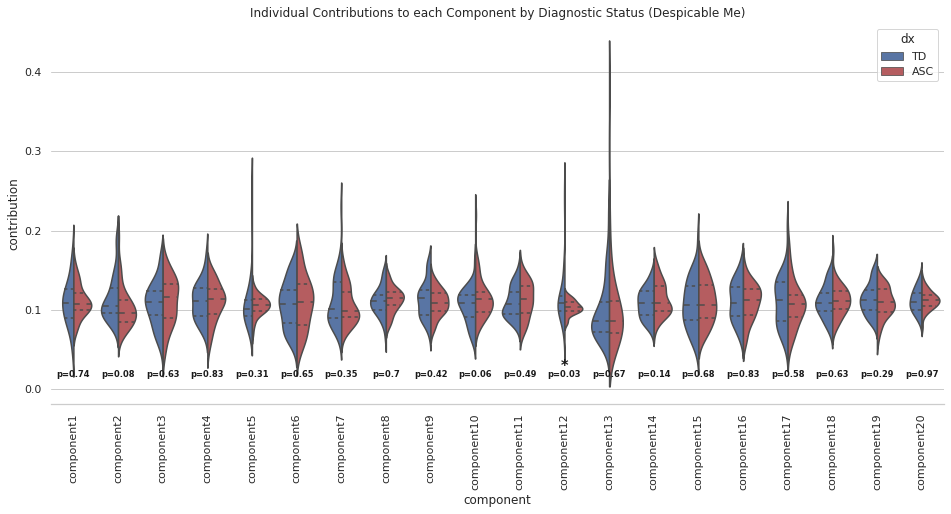

In [14]:
plt.rcParams['figure.dpi'] = 72
plt.rcParams['savefig.dpi'] = 72
plt.figure(figsize=(16,7))

sns.set_theme(style="whitegrid")
#sns.set(font_scale=2)
# Draw a nested violinplot and split the violins for easier comparison
violinplot=sns.violinplot(data=df, x="component", y="contribution", hue="dx",
               split=True, inner="quart", linewidth=1.5, palette={"TD": "b", "ASC": "r"})
sns.despine(left=True)
plt.xticks(rotation=90)


#p_values = df.groupby(['component'])['contribution'].median()
vertical_offset = df['contribution'].median() * 0.05 # offset from median for display

for xtick in violinplot.get_xticks():
    violinplot.text(xtick,0.01 + vertical_offset, f'p={round(p_list[xtick],2)}', 
            horizontalalignment='center',size='x-small',color='k',weight='semibold')
xtick=11
violinplot.text(xtick,0.02 + vertical_offset, f'*', 
            horizontalalignment='center',size='large',color='k',weight='semibold')

violinplot.set(title='Individual Contributions to each Component by Diagnostic Status (Despicable Me)')

### Visualize Component Timecourses

In [17]:
#temporal_modes=mat_contents['result']['U'][0,rank][1,0]
temporal_modes.shape
abs_temp=np.absolute(temporal_modes)
abs_temp.shape

(750, 20)

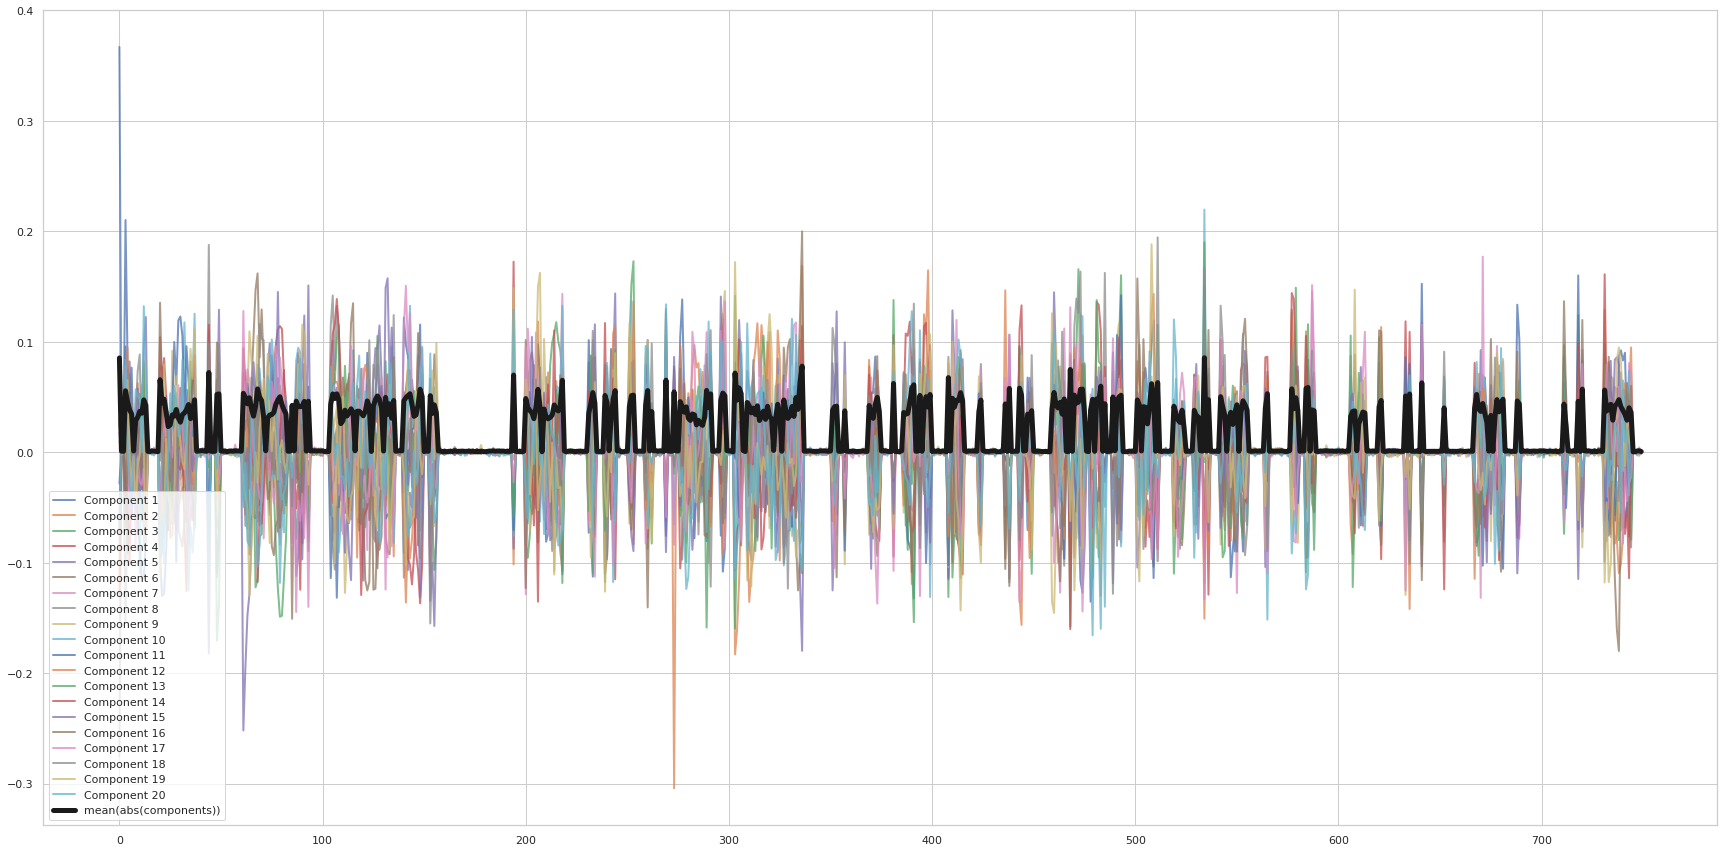

In [18]:
plt.figure(figsize=(30,15))
for t in np.arange(20):
    #plt.figure(figsize=(20,7))
    plt.plot(temporal_modes[:,t],label=f'Component {t+1}',linewidth=2,alpha=0.75)
#plt.ylim( -0.5, 0.5 )
plt.plot(np.mean(abs_temp,axis=1),c='k',linewidth=5,label='mean(abs(components))')
plt.legend(loc='lower left')



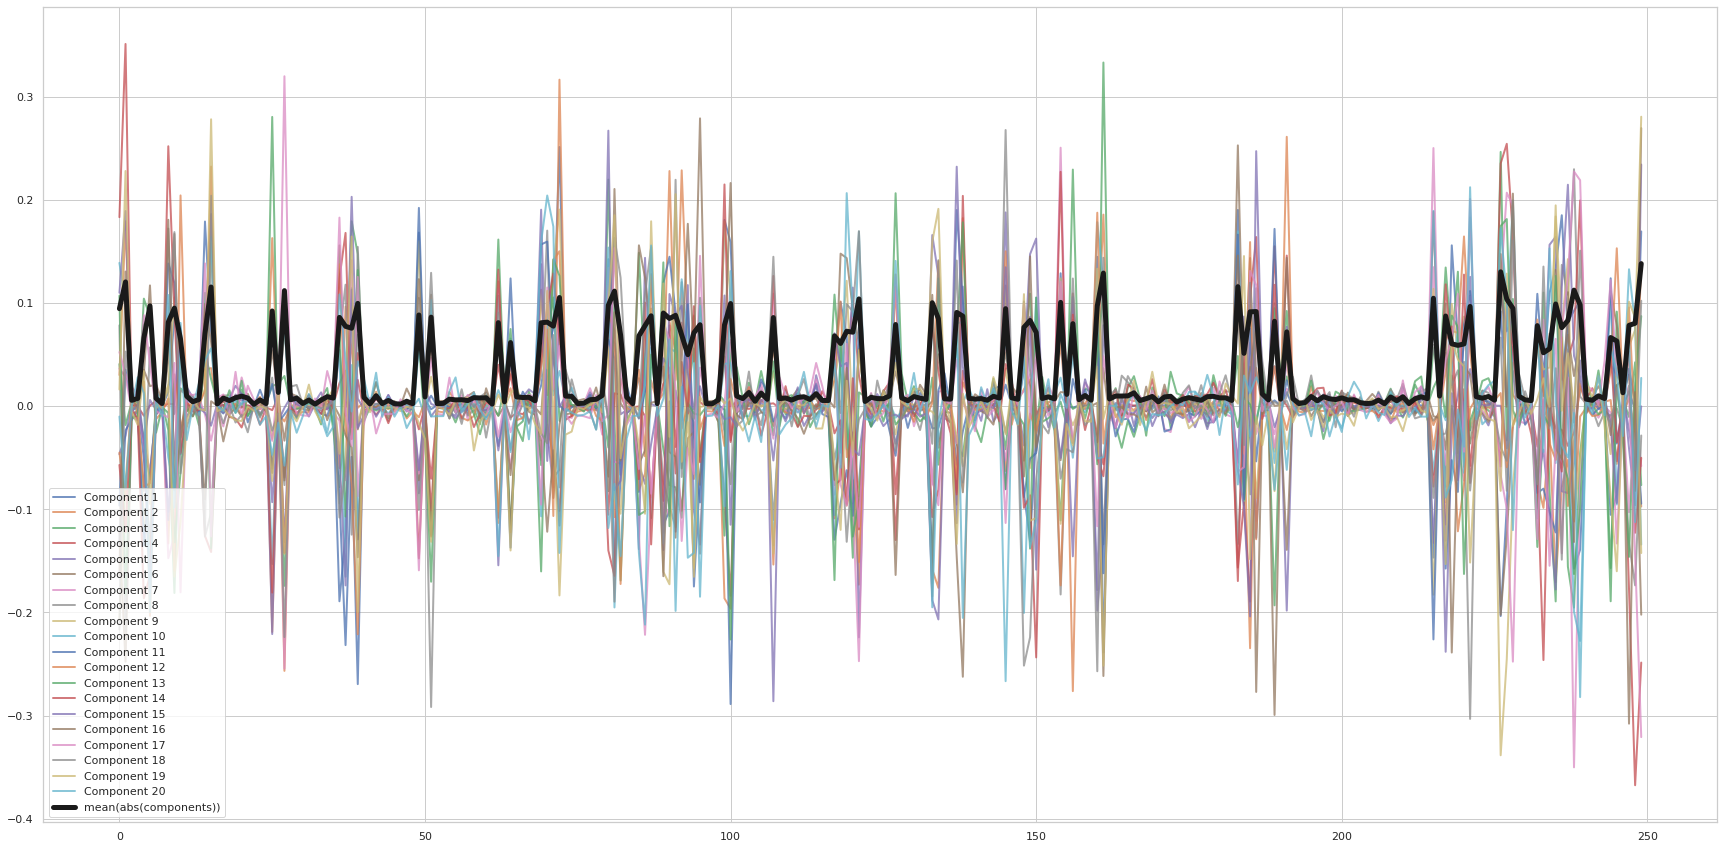

In [146]:
plt.figure(figsize=(30,15))
for t in np.arange(20):
    #plt.figure(figsize=(20,7))
    plt.plot(temporal_modes[:,t],label=f'Component {t+1}',linewidth=2,alpha=0.75)
#plt.ylim( -0.5, 0.5 )
plt.plot(np.mean(abs_temp,axis=1),c='k',linewidth=5,label='mean(abs(components))')
plt.legend(loc='lower left')


(250, 20)

## Plot TP timecourse and correlated features

### load features
load features into 'features' list and their names into 'class_names' list

In [34]:
features=[]
feature_names=[]
feature_dir='/om2/scratch/Fri/jsmentch/nat_img/sourcedata/data/HBN/features/'

#load YAMNET audioset features
class_names, as_classes_label, as_classes, labels = utility.load_yamnet_info()
class_names=list(class_names)
as_scores=np.load(f'{feature_dir}TP_as_scores.npy')
as_scores=apply_optimal_hrf_10hz(as_scores,2)

#get top 5 audioset features and print them
means=np.mean(as_scores, axis=0)
for l in list (means.argsort()[-5:][::-1] ):
    print(class_names[l])
    features.append( npp.zs(utility.downsample(as_scores[:,l],250)) )
    feature_names.append(class_names[l])

#load more features
#for f in ['optic_flow','brightness','frac_high_saliency','max_saliency','vibrance']:
for f in ['optic_flow','brightness','frac_high_saliency','vibrance']:
    loaded_f=np.load(f'{feature_dir}TP_{f}_10hz.npy')
#     plt.figure(figsize=(20,7))
#     plt.plot(loaded_f)
#     print(np.asanyarray(loaded_f)[np.newaxis,:].shape)
    loaded_f=apply_optimal_hrf_10hz( np.asanyarray(loaded_f)[:,np.newaxis] ,10)
#     plt.figure(figsize=(20,7))
#     plt.plot(loaded_f)
    loaded_f=utility.downsample(list(loaded_f.squeeze()),250)
#     plt.figure(figsize=(20,7))
#     plt.plot(loaded_f)
#     plt.figure(figsize=(20,7))
#     plt.plot(npp.zs(loaded_f) )
    features.append( npp.zs(loaded_f) )
    feature_names.append(f)
    
print('feature_names ', feature_names)
print('len(features) ', len(features) )


Music
Speech
Animal
Vehicle
Dog
feature_names  ['Music', 'Speech', 'Animal', 'Vehicle', 'Dog', 'optic_flow', 'brightness', 'frac_high_saliency', 'vibrance']
len(features)  9


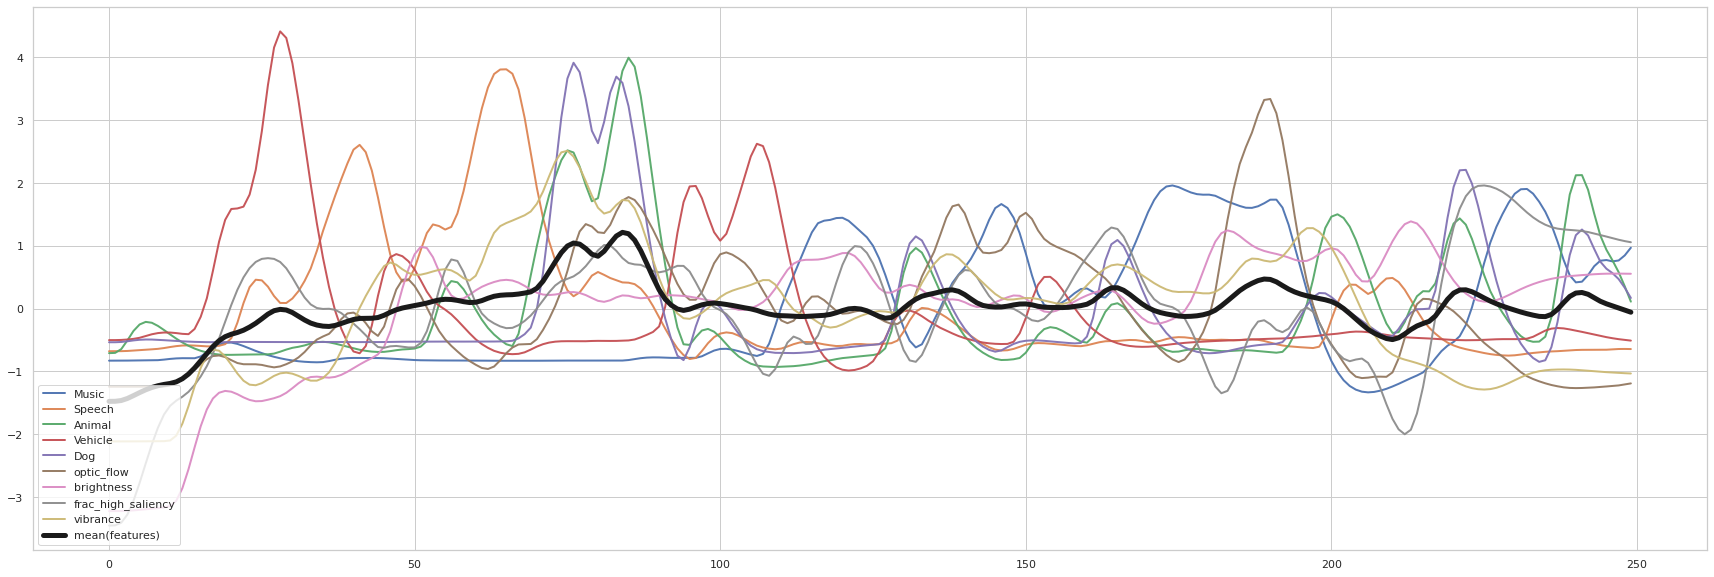

In [148]:
plt.figure(figsize=(30,10))
for i,f in enumerate(features):
    plt.plot(f, label=f'{feature_names[i]}',linewidth=2,alpha=0.95)
# for t in np.arange(20):
#     #plt.figure(figsize=(20,7))
#     plt.plot(temporal_modes[:,t],label=f'Component {t+1}',linewidth=2,alpha=0.75)
#plt.ylim( -0.5, 0.5 )
plt.plot(np.mean(np.asanyarray(features),axis=0),c='k',linewidth=5,label='mean(features)')
plt.legend(loc='lower left')


Text(0.5, 0, 'TR')

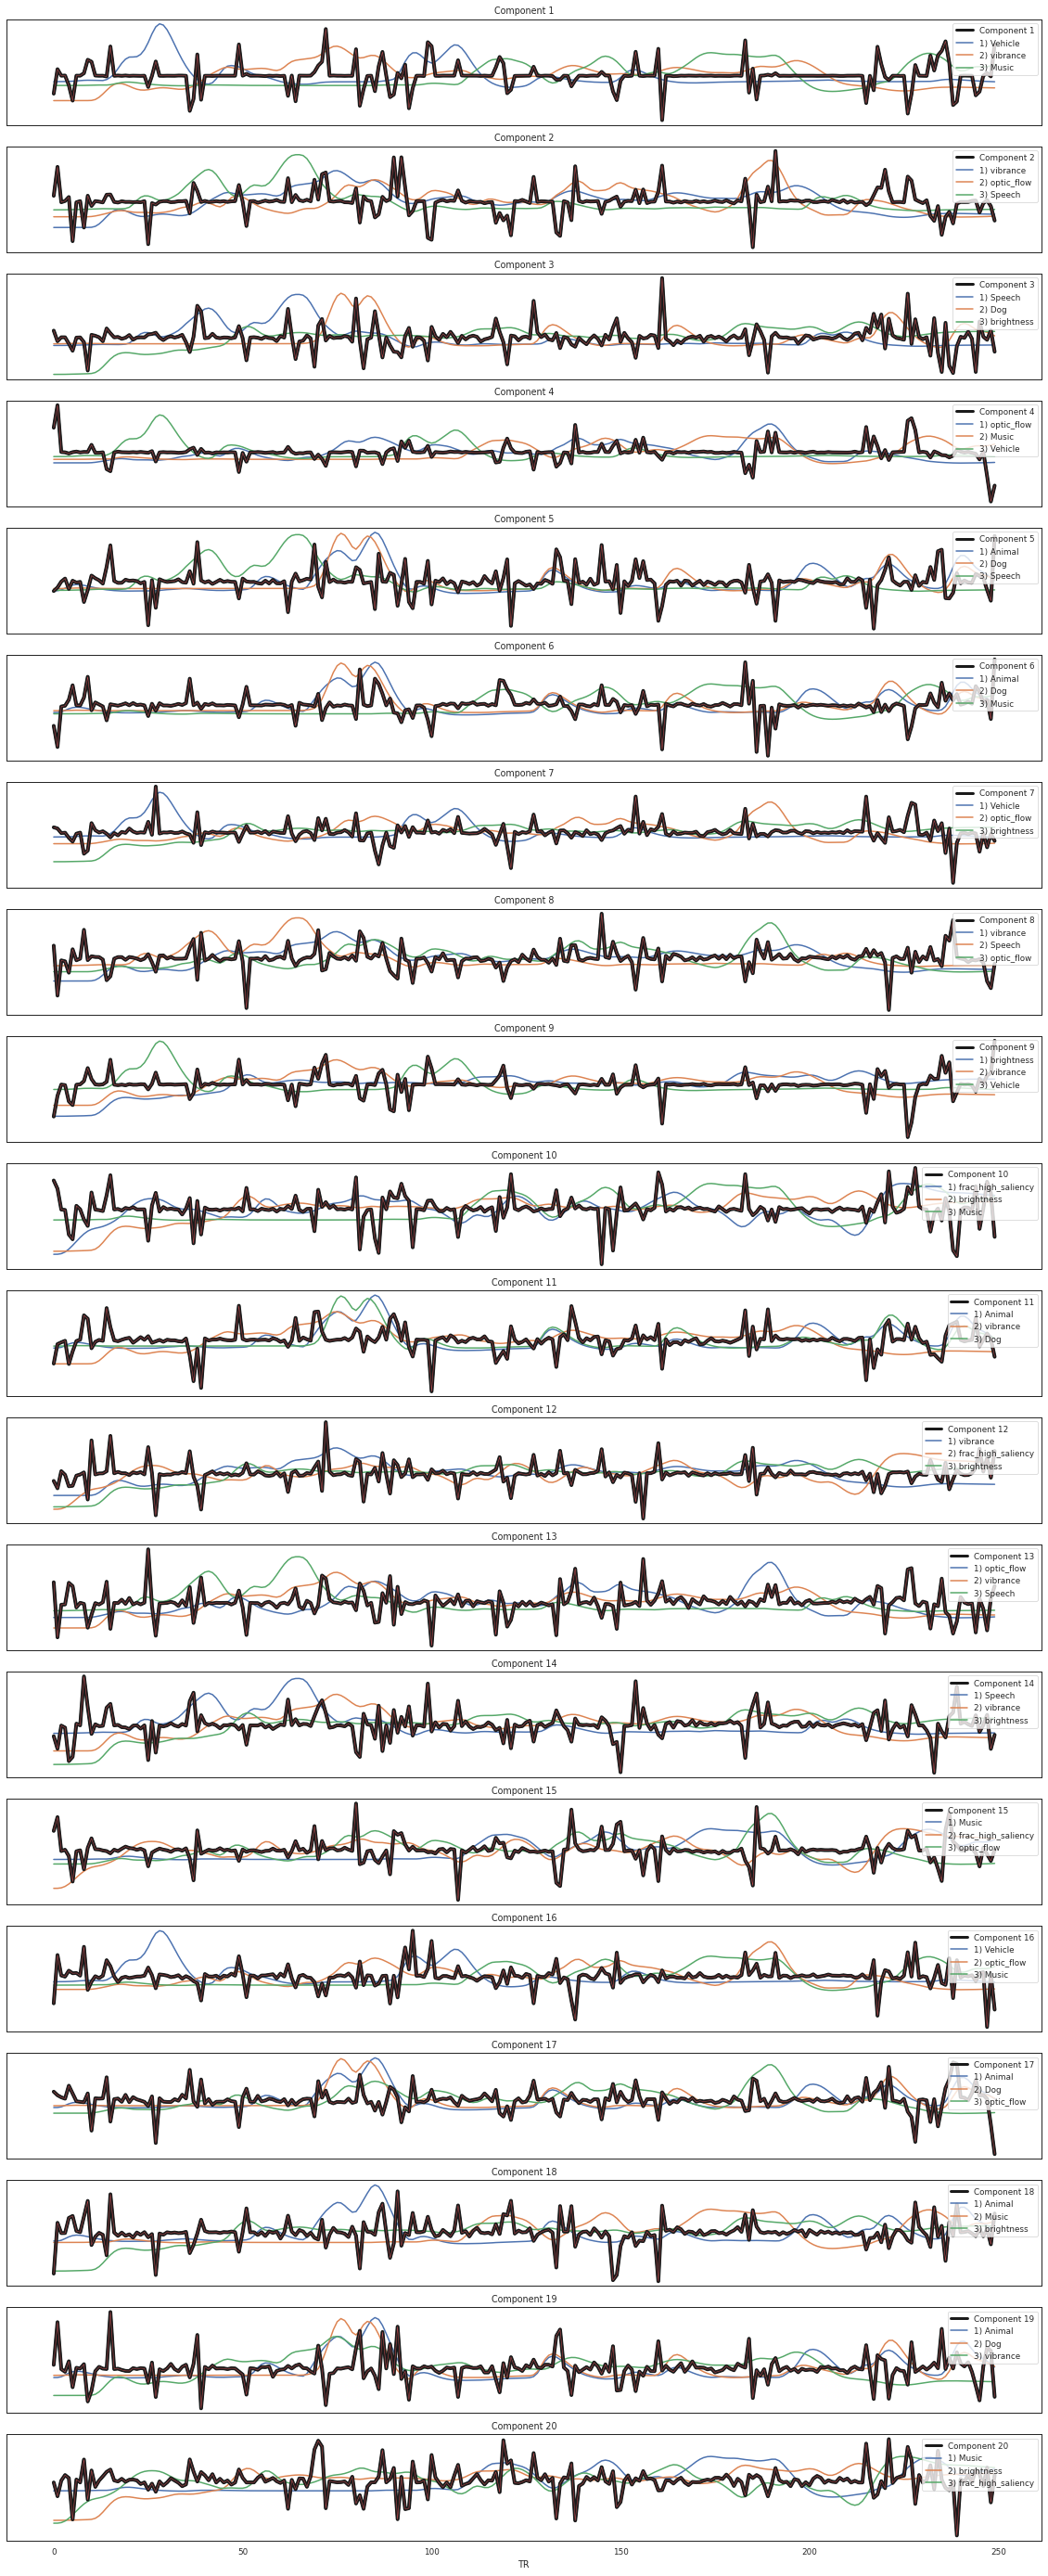

In [81]:
corr_list_list=[]
for t in np.arange(20):
    corr_list=[]
    current_t=npp.zs(temporal_modes[:,t])
    for f in features:
        corr_list.append( np.correlate(f, current_t )[0] )
    corr_list_list.append(corr_list)
corr_list_list=np.asanyarray(corr_list_list)

# top_corr=[]
# top_corr_ind=[]
# for corr_list in corr_list_list:
#     top_corr.append(  feature_names [np.asanyarray(corr_list).argmax()]  )
#     top_corr_ind.append(np.asanyarray(corr_list).argmax())


# axs[0].scatter(nt_list,np.random.random(nt_list.shape),15,label=nt_label,c='g',alpha=0.5)
# axs[0].scatter(adhd_list,np.random.random(adhd_list.shape),15,label=adhd_label,c='b',alpha=0.5)
# axs[0].scatter(depression_list,np.random.random(depression_list.shape),15,label=depression_label,c='r',alpha=0.5)
# axs[0].scatter(asd_list,np.random.random(asd_list.shape),15,label=asd_label,c='m',alpha=0.5)
# axs[0].set_yticklabels([])
# axs[0].legend()
# axs[0].set_xlim(0,0.5)



fig, axs = plt.subplots( len(corr_list_list), 1, figsize=(20,50),sharex=True,squeeze=True)
#fig.suptitle('HBN TITLE')
for t,corr_list in enumerate(corr_list_list):
#     axs[0].figure(figsize=(20,7))
    axs[t].plot( npp.zs(temporal_modes[:,t]) ,label=f'Component {t+1}', color='k', linewidth=3)

    for i,top in enumerate( corr_list.argsort()[-3:][::-1] ):
        axs[t].plot( features[top], label=f'{i+1}) {feature_names[top]}', linewidth=1.5)
    axs[t].legend(loc='upper right')
    axs[t].plot( npp.zs(temporal_modes[:,t]) ,label=f'Component {t+1}', color='k', linewidth=4)
    axs[t].plot( npp.zs(temporal_modes[:,t]) ,label=f'Component {t+1}', color='r', linewidth=0.5)
    axs[t].title.set_text(f'Component {t+1}')
    axs[t].set_yticklabels([])
axs[t].set_xlabel('TR')

## Plot DM features and correlations

In [20]:
DM_df=pd.read_csv('../sourcedata/data/HBN/features/DM_pliers_all.csv')
DM_df.drop(columns=DM_df.columns[0], axis=1, inplace=True)
DM_df

brightness  sharpness  face_detectionConfidence  \
0      0.246131        1.0                  0.000000   
1      0.243845        1.0                  0.000000   
2      0.244726        1.0                  0.000000   
3      0.258668        1.0                  0.000000   
4      0.268842        1.0                  0.000000   
..          ...        ...                       ...   
595    0.106606        1.0                  0.000000   
596    0.329696        1.0                  0.000000   
597    0.329386        1.0                  0.615383   
598    0.141205        1.0                  0.000000   
599    0.146615        1.0                  0.000000   

     face_landmarkingConfidence  abstract    action  alphabet    animal  \
0                      0.000000  0.167749  0.363600  0.002034  0.093345   
1                      0.000000  0.204442  0.388526  0.003572  0.147960   
2                      0.000000  0.214081  0.381101  0.003139  0.108687   
3                      0.000000  0.126873  0.236590  0.003892  0.105058   
4                      0.000000  0.264085  0.385225  0.003718  0.181262   
..                          ...       ...       ...       ...       ...   
595                    0.000000  0.898762  0.517553  0.002320  0.120638   
596                    0.000000  0.294298  0.428923  0.001047  0.276501   
597                    0.130395  0.405134  0.461771  0.001875  0.109203   
598                    0.000000  0.932255  0.149778  0.002502  0.041972   
599                    0.000000  0.948042  0.267083  0.004377  0.177723   

     architecture       art  ...    mfcc_11    mfcc_12    mfcc_13   mfcc_14  \
0        0.533596  0.722260  ...   3.394691   2.047086  -2.894316 -0.286717   
1        0.576969  0.758181  ...  -8.905154  -1.781101   8.469676 -4.424966   
2        0.503560  0.803089  ...  -6.194043 -10.234765   2.831864 -2.648869   
3        0.581153  0.826734  ...   2.028557 -11.561363  -6.274574 -6.064760   
4        0.641755  0.853740  ... -18.749567 -17.109541  -3.418450 -7.354648   
..            ...       ...  ...        ...        ...        ...       ...   
595      0.291205  0.744076  ...   2.691839   8.580536  15.911509  7.112349   
596      0.052066  0.650944  ...   8.895519  10.239916  11.524013  7.770943   
597      0.083333  0.661233  ...   6.899698   1.300383   4.011791  4.093169   
598      0.003888  0.800101  ...   3.187621   2.082713  -2.619781  0.160768   
599      0.009847  0.878194  ...   2.881188  -2.956055  -1.875432 -4.110514   

       mfcc_15   mfcc_16   mfcc_17   mfcc_18    mfcc_19    vibrance  
0     6.342724  5.425536  0.909868  1.663460   4.637609  501.776222  
1     5.635565  5.956702 -0.705075  4.817046  -0.041792  503.895218  
2    -0.701678 -4.219223  4.170469  6.358319  -4.099131  508.354185  
3    -6.904429 -5.554349 -1.078951  2.417915  -5.254695  502.173525  
4    -6.871152 -2.616362  2.651057 -0.229634  -5.254941  530.951346  
..         ...       ...       ...       ...        ...         ...  
595  12.356004  7.507671 -5.595244 -6.956372  -5.310825  104.029311  
596   7.806584  3.544562 -2.694659 -2.387859  -6.526293  478.908754  
597   4.888222  1.624974  2.472670  2.027416   1.623478  464.330886  
598   4.344271  3.139183  4.333610  7.584646  10.968047  191.240936  
599  -3.756753 -2.533732 -0.381141  5.772023   8.355339  233.793626  

[600 rows x 215 columns]

In [6]:
feature_names=[]
features=[]
for (columnName, columnData) in DM_df.items():
    feat=columnData.values
    feature_names.append(columnName)
    #plt.figure(figsize=(10,5))
    #plt.plot(np.asanyarray(feat))
    loaded_f=apply_optimal_hrf_10hz( np.asanyarray(feat)[:,np.newaxis] ,1).squeeze()
    loaded_f=utility.downsample(list(loaded_f.squeeze()),750)

    #plt.figure(figsize=(10,5))
    #plt.plot(np.asanyarray(npp.zs(loaded_f)))
    features.append( npp.zs(loaded_f) )
print('feature_names ', feature_names)
print('len(features) ', len(features) )


feature_names  ['brightness', 'sharpness', 'face_detectionConfidence', 'face_landmarkingConfidence', 'abstract', 'action', 'alphabet', 'animal', 'architecture', 'art', 'blur', 'building', 'business', 'car', 'child', 'city', 'color', 'competition', 'creativity', 'dark', 'daylight', 'design', 'desktop', 'empty', 'equipment', 'face', 'family', 'fashion', 'furniture', 'girl', 'hand', 'home', 'horizontal', 'illustration', 'image', 'indoors', 'landscape', 'light', 'man', 'military', 'music', 'nature', 'old', 'one', 'outdoors', 'pattern', 'people', 'portrait', 'recreation', 'retro', 'road', 'room', 'simplicity', 'sky', 'street', 'summer', 'sunset', 'technology', 'text', 'travel', 'two', 'vehicle', 'vertical', 'water', 'wear', 'wild', 'wildlife', 'woman', 'wood', 'writing', 'num_faces', 'speech', 'shot_change', 'text_length', 'fake_text_length', 'fake_Conc.M', 'fake_Duration', 'fake_FreqCOCAspok', 'fake_NumPhones', 'fake_NumSylls', 'fake_PhonLev', 'log_mean_face_time_cum', 'face_count', 'log_m

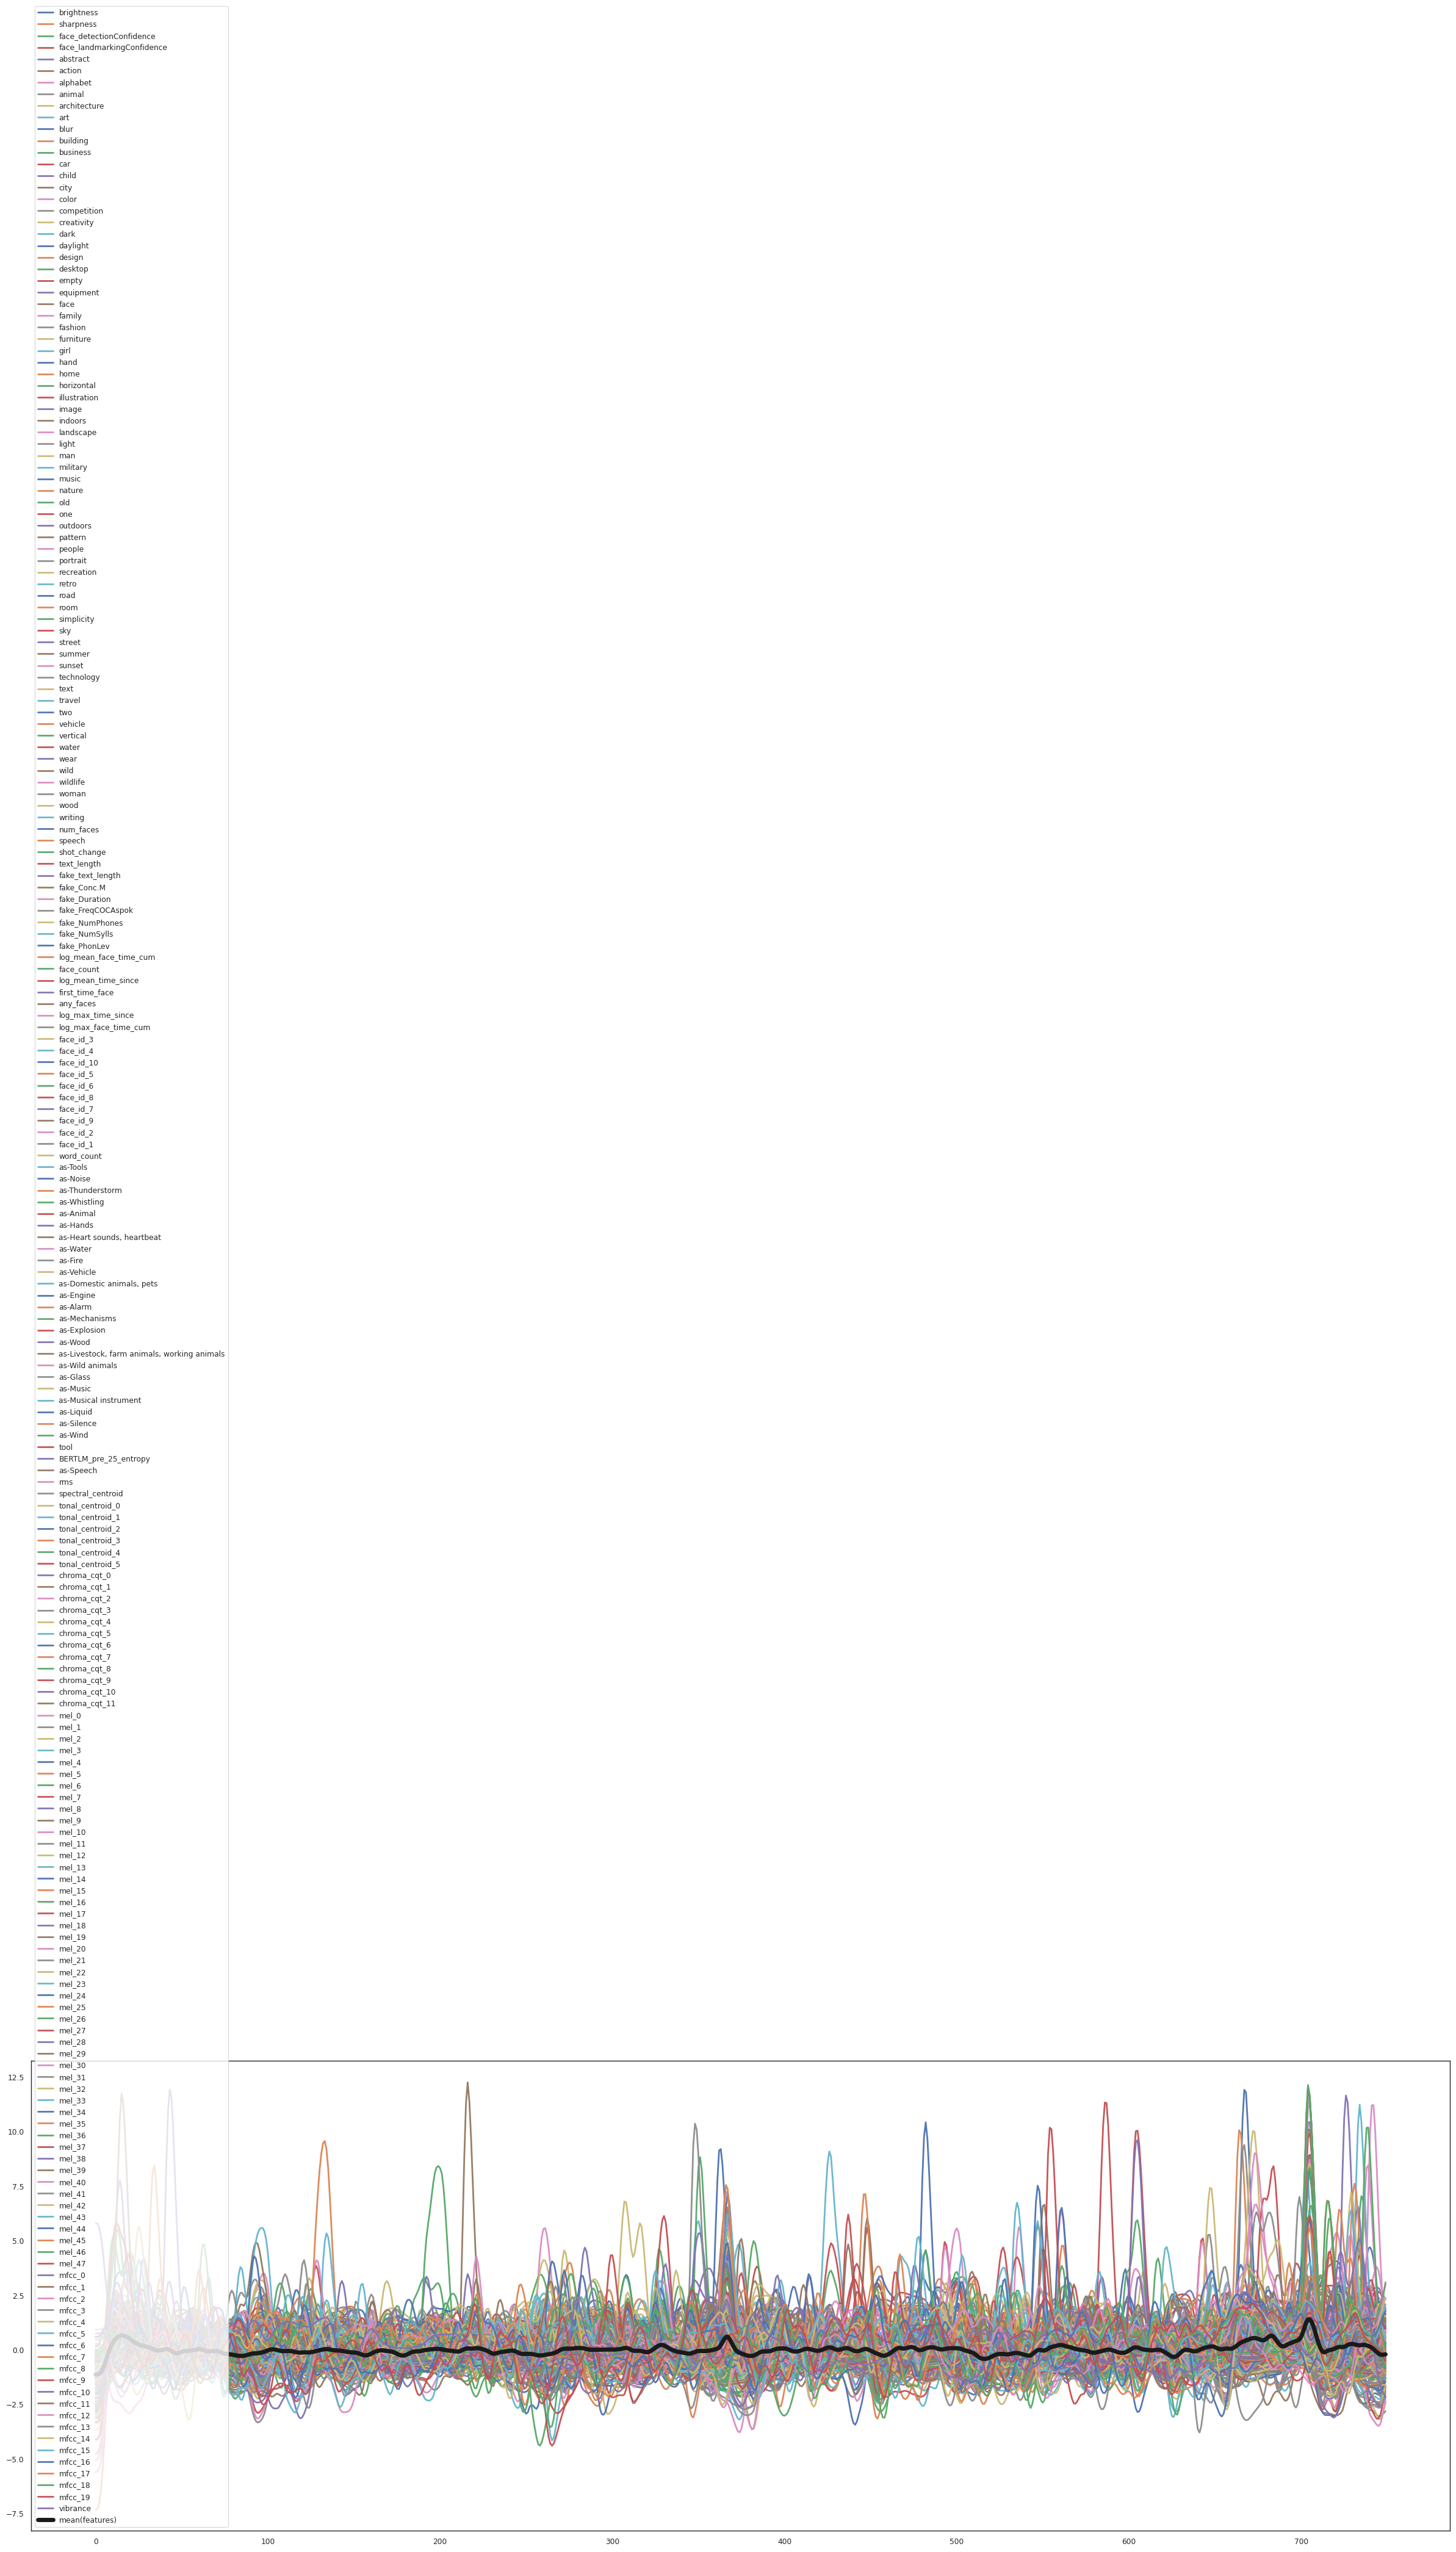

In [7]:
plt.figure(figsize=(30,10))
for i,f in enumerate(features):
    plt.plot(f, label=f'{feature_names[i]}',linewidth=2,alpha=0.95)
# for t in np.arange(20):
#     #plt.figure(figsize=(20,7))
#     plt.plot(temporal_modes[:,t],label=f'Component {t+1}',linewidth=2,alpha=0.75)
#plt.ylim( -0.5, 0.5 )
plt.plot(np.mean(np.asanyarray(features),axis=0),c='k',linewidth=5,label='mean(features)')
plt.legend(loc='lower left')


Text(0.5, 0, 'TR')

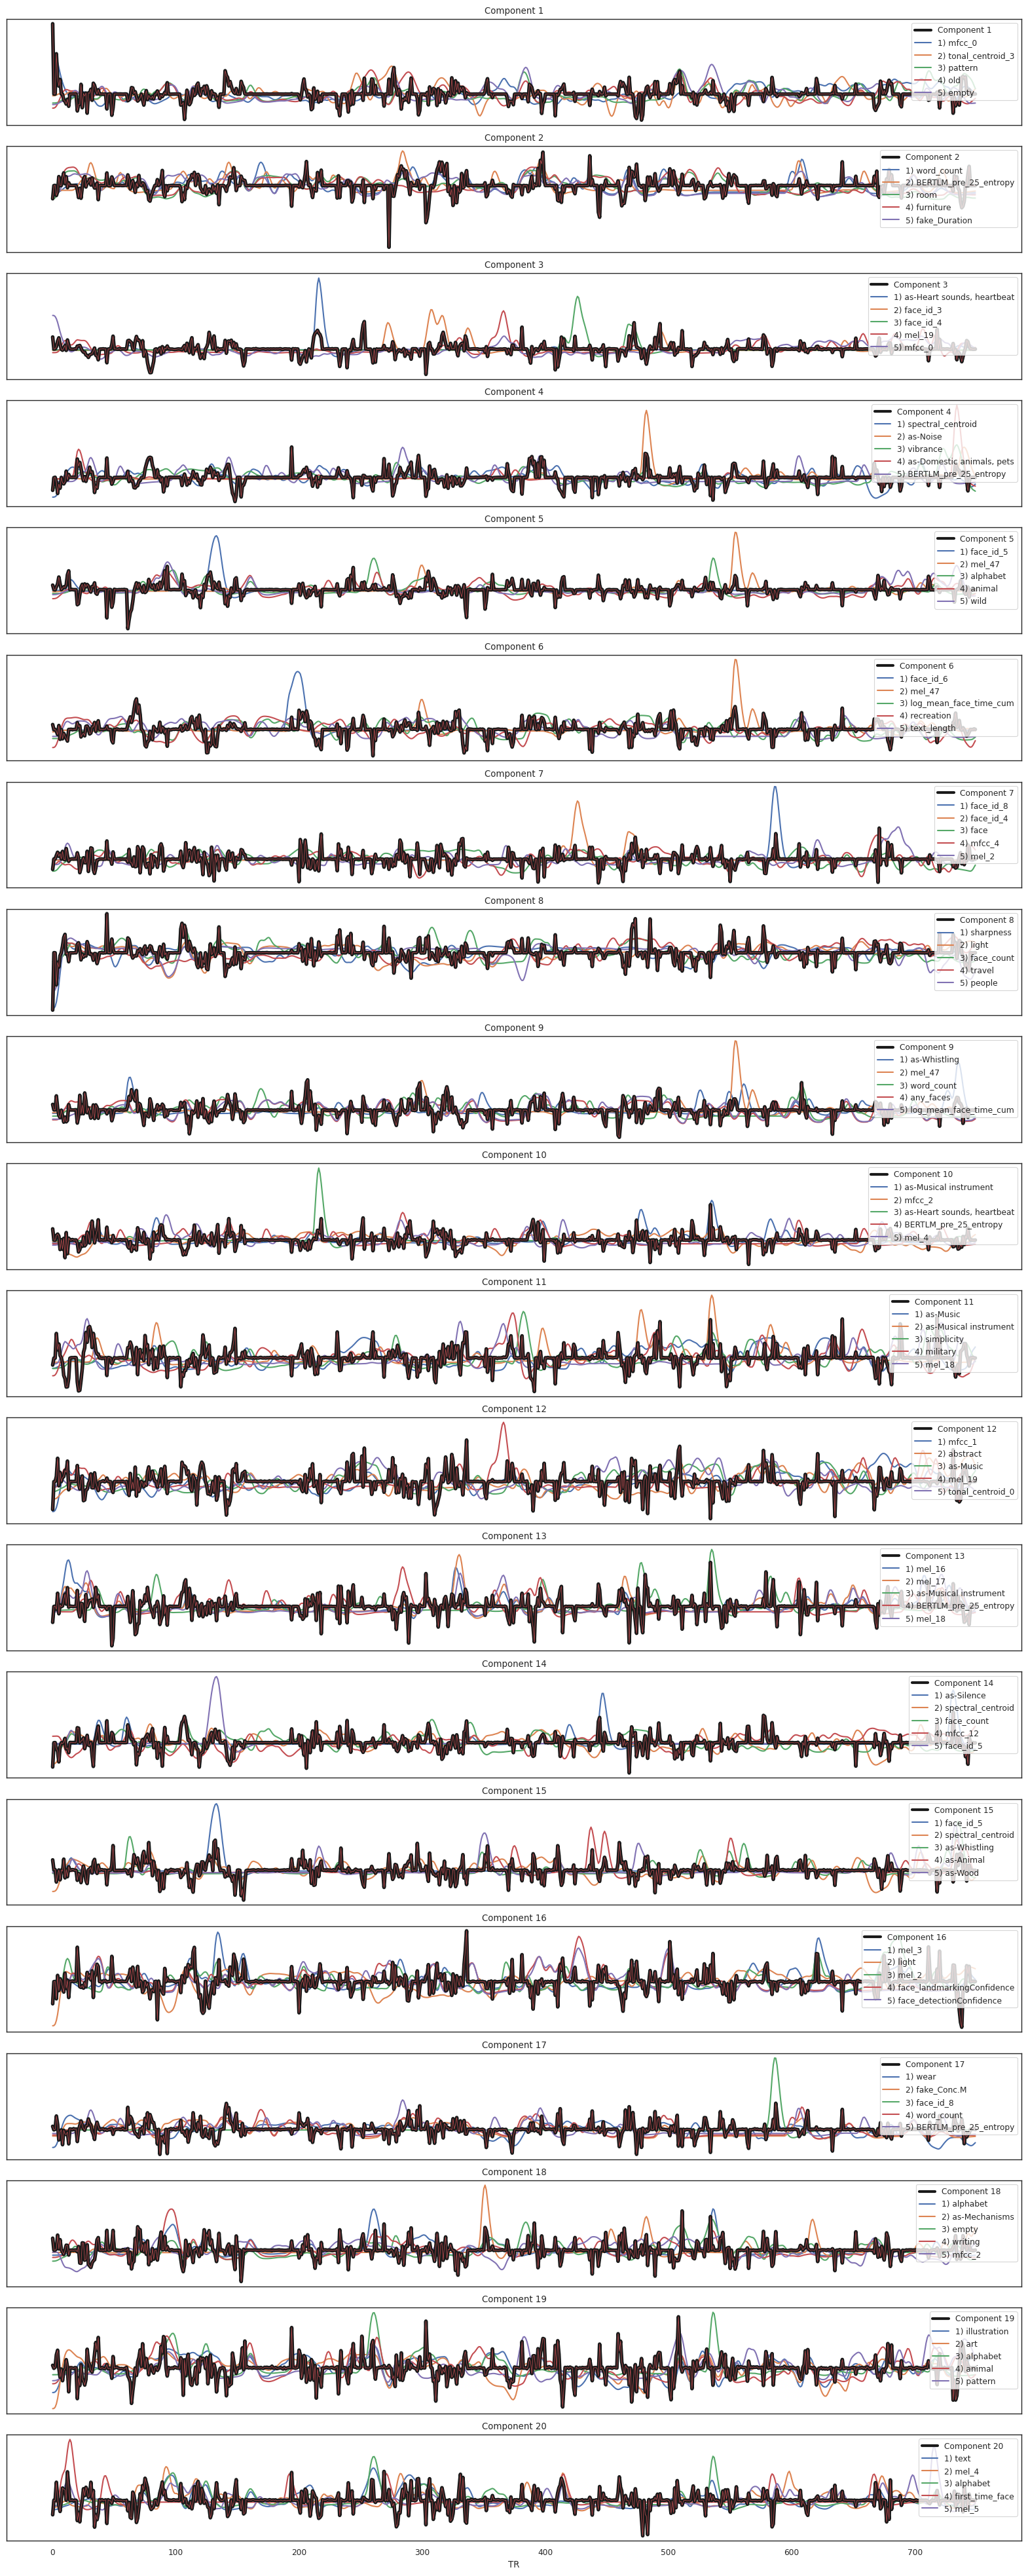

In [8]:
corr_list_list=[]
for t in np.arange(20):
    corr_list=[]
    current_t=npp.zs(temporal_modes[:,t])
    for f in features:
        corr_list.append( np.correlate(f, current_t )[0] )
    corr_list_list.append(corr_list)
corr_list_list=np.asanyarray(corr_list_list)

# top_corr=[]
# top_corr_ind=[]
# for corr_list in corr_list_list:
#     top_corr.append(  feature_names [np.asanyarray(corr_list).argmax()]  )
#     top_corr_ind.append(np.asanyarray(corr_list).argmax())


# axs[0].scatter(nt_list,np.random.random(nt_list.shape),15,label=nt_label,c='g',alpha=0.5)
# axs[0].scatter(adhd_list,np.random.random(adhd_list.shape),15,label=adhd_label,c='b',alpha=0.5)
# axs[0].scatter(depression_list,np.random.random(depression_list.shape),15,label=depression_label,c='r',alpha=0.5)
# axs[0].scatter(asd_list,np.random.random(asd_list.shape),15,label=asd_label,c='m',alpha=0.5)
# axs[0].set_yticklabels([])
# axs[0].legend()
# axs[0].set_xlim(0,0.5)



fig, axs = plt.subplots( len(corr_list_list), 1, figsize=(20,50),sharex=True,squeeze=True)
#fig.suptitle('HBN TITLE')
for t,corr_list in enumerate(corr_list_list):
#     axs[0].figure(figsize=(20,7))
    axs[t].plot( npp.zs(temporal_modes[:,t]) ,label=f'Component {t+1}', color='k', linewidth=3)

    for i,top in enumerate( corr_list.argsort()[-5:][::-1] ):
        axs[t].plot( features[top], label=f'{i+1}) {feature_names[top]}', linewidth=1.5)
    axs[t].legend(loc='upper right')
    axs[t].plot( npp.zs(temporal_modes[:,t]) ,label=f'Component {t+1}', color='k', linewidth=4)
    axs[t].plot( npp.zs(temporal_modes[:,t]) ,label=f'Component {t+1}', color='r', linewidth=0.5)
    axs[t].title.set_text(f'Component {t+1}')
    axs[t].set_yticklabels([])
axs[t].set_xlabel('TR')